## **Desafios**

### **Análise de Sentimentos/NLP**

#### **Objetivo**

##### Produzir um modelo de Machine Learning para classificar o sentimentos dos usuários em relação às compras de acordo com os reviews dos produtos.

* Entregáveis
1. Data Pipeline para automatizar as etapas de ETL.
> 
2. Modelo de classificação que dado um determinado conjunto de teste o modelo consiga retornar a classificação em positivo, negativo ou neutro.
> 
3. Relatório com os insights gerados a partir dos dados.

Um sistema de análise de sentimentos com conteúdo textual combina processamento de linguagem natural (PNL/NLP) com técnicas de Machine Learning
para conferir pontuações ponderadas de sentimentos à sentenças.

Visto que a inteligência artificial visa simular a estrutura de pensamento dos seres humanos, bem como permitir diálogos complexos entre máquina e humano, 
o NLP é indispensável para permitir que a máquina compreenda o que está sendo dito e possa estruturar a melhor resposta.

Em suma, a inteligência artificial usa o processamento de linguagem natural para entender a linguagem humana e simulá-la.

Além do NLP, alguns outros conceitos estão incluídos no processamento da Inteligência Artificial, entre eles machine learning e deep learning NLP.


#### **Chamando as primeiras bibliotecas**

In [1]:
import numpy as np
import pandas as pd
#!pip install tabulate

In [2]:
df_original = pd.read_csv("review.csv") # csv com os dados de review dos usuários
print("Print de algumas colunas (2-7)")
print("\n")
df_c = print(df_original .iloc[:, 2:7].head(5))

Print de algumas colunas (2-7)


   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53  


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [4]:
df_original.isnull().sum()

# 99224-58247 = 40977 (58% de valores nulos)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### **Comparando a quantidade de valores nulos das duas variáveis em plot**

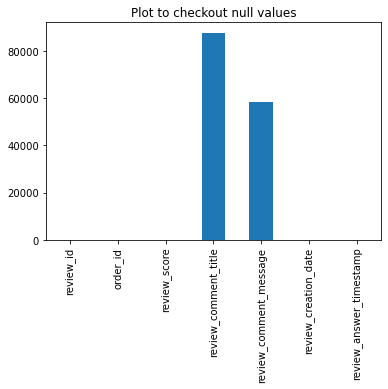

In [5]:
import matplotlib.pyplot as plt

df_original.isna().sum().plot(kind = 'bar')
plt.title('Plot to checkout null values')
plt.show()

#### **i- Importando algumas bibliotecas de plotagem**

#### **ii- Análise Exploratória**

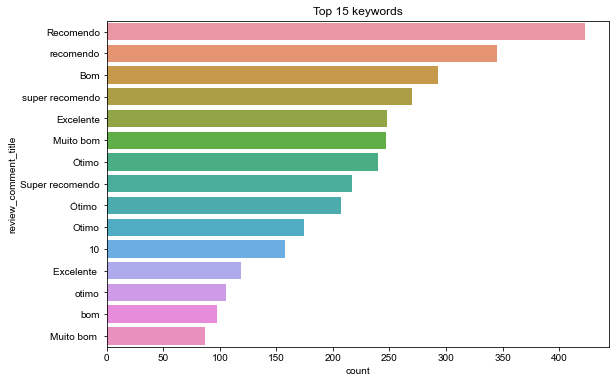

In [6]:
import seaborn as sns

sns.set_palette('Spectral')
plt.figure(figsize=(9,6))
sns.countplot(y = df_original.review_comment_title, order= df_original.review_comment_title.value_counts().iloc[:15].index)
sns.set_style("whitegrid", {"axes.facecolor": ".9"}) 
plt.title('Top 15 keywords')
plt.show()

# As variáveis review_comment_title e review_comment_message são similares, porém a segunda apresenta uma gama maior de dados que podemos análisar com a NLP, 
# e também menos dados faltantes

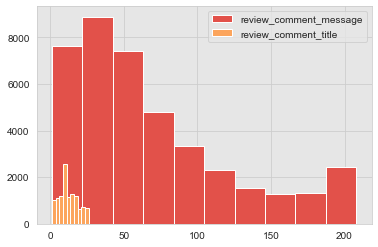

In [7]:
# Analisando a riqueza (em strings) das duas variáveis, para uma análise de sentimentos isso pode ser importante

plt.hist(df_original['review_comment_message'].str.len(), label = 'review_comment_message')
plt.hist(df_original['review_comment_title'].str.len(),label = 'review_comment_title')
plt.legend()
plt.show()

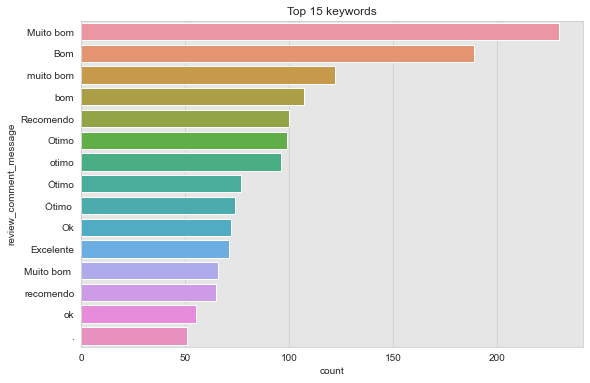

In [8]:
# A variável review_comment_message apresenta 58% de valores faltantes, porém não temos como fazer tratamento desses dados por substituição
# A única alternativa é dropar os dados faltantes e trabalhar com a amostra que temos

sns.set_palette('husl')
plt.figure(figsize=(9,6))
sns.countplot(y = df_original.review_comment_message, order= df_original.review_comment_message.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()


In [9]:
# Vamos primeiro fazer uma cópia da df para não prejudicar a original, caso precisemos dela depois
# Dropando as linhas com dados faltantes

df_copy = df_original
df_copy.dropna(inplace = True)
df_copy.drop("review_id", axis=1,inplace=True)
df_copy.drop("order_id", axis=1,inplace=True)
df_copy.head(10)

,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02
36,5,Bom,"Recomendo ,",2018-06-13 00:00:00,2018-06-13 22:54:44
38,5,Maravilhoso!,"Tô completamente apaixonada, loja super respon...",2018-08-10 00:00:00,2018-08-11 00:22:13
43,5,Entrega perfeita,Muito bom. muito cheiroso.,2018-06-13 00:00:00,2018-06-14 17:29:03
59,5,MT lindo,MT lindo,2018-07-25 00:00:00,2018-07-25 21:37:22
67,5,Ótimo Produto!,Recomendo o vendedor...,2018-08-17 00:00:00,2018-08-17 21:47:08


In [10]:
# Droparei mais variáveis que acredito não apresentarem influência na análise

df_copy.drop("review_answer_timestamp", axis=1,inplace=True)
df_copy.drop("review_creation_date", axis=1,inplace=True)
df_copy.drop("review_comment_title", axis=1,inplace=True)
df_copy.head()

,review_score,review_comment_message
9,4,aparelho eficiente. no site a marca do aparelh...
15,5,"Vendedor confiável, produto ok e entrega antes..."
19,1,Péssimo
22,5,Loja nota 10
34,4,Recebi exatamente o que esperava. As demais en...


In [11]:
df_copy.review_score.value_counts()

5    5422
1    1789
4    1433
3     737
2     458
Name: review_score, dtype: int64

In [12]:
# O que podemos inferir em relação à variável de Score?
# Temos 5 classes, mais da metade está na melhor classificação, porém a segunda classificação mais frequente está em péssimo

import plotly.express as px
px.pie(df_copy,names='review_score',title='Distribution of Review Score',hole=0.5)

#### Podemos também analisar o conteúdo de cada review em relação ao score (em ordem ascendente)
1 - Péssimo  
2 - Ruim  
3 - Neutro  
4 - Bom  
5 - Excelente

In [13]:
analysis_1 = df_copy[df_copy['review_score'] == 1]['review_comment_message']
print(analysis_1.head(10))

19                                               Péssimo
167                                    A peça não serviu
190     Faltou 1 produto e os que recebi 1 veio quebrado
197    aqui está descrevendo como entregue só que ate...
276    Cancelaram a minha compra um dia antes da entr...
332    Boa Noite\r\n\r\né lamentável, esta loja que t...
426    Quando instalei o cartucho de tinta, a minha i...
863    PRODUTO JA CHEGOU COM DEFEITO NÃO FUCIONOU CON...
924                        Ainda não recebi o produto...
934    Comprei 2 produtos so mandaram 1 e n mim deram...
Name: review_comment_message, dtype: object


In [14]:
analysis_2 = df_copy[df_copy['review_score'] == 2]['review_comment_message']
print(analysis_2.head(10))

336     A capa protetora não é exatamente o que eu esp...
685     O produto não está nas medidas corretas indica...
818     Penso que deveria haver um modo de se comunica...
1208    Bom dia ... comprei um bebedouro vermelho metá...
1337    Pedi duas carteiras. Uma veio com defeito e ou...
1379    Boa noite na compra diz wireless 150mbs Multil...
2391    Apesar da demora na entrega. No mais foi tudo ...
2407    Eu pedi dois kit e só chegou apenas um o outro...
2546                    Eu não recebi minha cortina ainda
2949    Segundo site da Pineng, consta uma relação de ...
Name: review_comment_message, dtype: object


In [15]:
analysis_3 = df_copy[df_copy['review_score'] == 3 ]['review_comment_message'] 
print(analysis_3.head(10))

131    A entrega foi dividida em duas. Não houve comu...
201                                Comecei a usar agora 
207    Comprar um produto correto na capa mas interno...
212    Fiz um pedido de 4 garrafas de azeite.Chegaram...
253    Apesar de ter sido entregue rapidamente, subst...
341    No site o produto parece ter melhor qualidade ...
394    recebe apenas 01 peça do produto! estou precis...
455    Fiquei feliz com. O tecido ,mas acho que falto...
726             SOLICITEI DEVOLUÇÃO. PRODUTO COM DEFEITO
969                                           Muito bom.
Name: review_comment_message, dtype: object


In [16]:
analysis_4 = df_copy[df_copy['review_score'] == 4 ]['review_comment_message'] 
print(analysis_4.head(10))

9      aparelho eficiente. no site a marca do aparelh...
34     Recebi exatamente o que esperava. As demais en...
166     Se fosse vidro tinha quebrado; veio na caixa ...
324                             Tudo rápido e eficiente.
391       O pedido chegou antes do combinado, muito bom.
404    trabalho com profissionalismo das lojas lannis...
493                                            otimo\r\n
518                 Otimo produto porem caro demais !!! 
612                                          Boa compra.
735    Acho que o produto deveria ter um prazo de val...
Name: review_comment_message, dtype: object


In [17]:
analysis_5 = df_copy[df_copy['review_score'] == 5 ]['review_comment_message']
print(analysis_5.head(10))

15     Vendedor confiável, produto ok e entrega antes...
22                                          Loja nota 10
36                                           Recomendo ,
38     Tô completamente apaixonada, loja super respon...
43                            Muito bom. muito cheiroso.
59                                              MT lindo
67                              Recomendo o vendedor... 
79     O kit mochila patrulha canina é lindo!! Meu ne...
90                                         Super rápido.
108                                         OK RECOMENDO
Name: review_comment_message, dtype: object


#### **Reduzindo a variável Score para outra variável (classe)** 
#### *Classificações em Pos/Neutro/Neg*


In [18]:
# O dataset vem com uma coluna chamada "review_score", com o score de cada uma das revisões (de 1 a 5). 
# Aqui adiciono a coluna "classe" para polarizar os scores em positivos, neutros e negativos.

df_copy['classe'] = [ 'Positivo' if (x>3) else 'Neutro' if (x == 3) else 'Negativo' for x in df_copy['review_score']]
df_copy.head(10)

,review_score,review_comment_message,classe
9,4,aparelho eficiente. no site a marca do aparelh...,Positivo
15,5,"Vendedor confiável, produto ok e entrega antes...",Positivo
19,1,Péssimo,Negativo
22,5,Loja nota 10,Positivo
34,4,Recebi exatamente o que esperava. As demais en...,Positivo
36,5,"Recomendo ,",Positivo
38,5,"Tô completamente apaixonada, loja super respon...",Positivo
43,5,Muito bom. muito cheiroso.,Positivo
59,5,MT lindo,Positivo
67,5,Recomendo o vendedor...,Positivo


#### Verificando a porcentagem de correlação entre reviews relacionados ao atraso de produtos e sua classificação enquanto classe do cliente

In [19]:
indicador = ["atraso","atrasou","atrasado","atrasada"]

nome = '|'.join(indicador)
df_copy['indicador'] = df_copy.review_comment_message.str.contains(nome)
df_copy.query("indicador == True")
df_copy.head()

,review_score,review_comment_message,classe,indicador
9,4,aparelho eficiente. no site a marca do aparelh...,Positivo,False
15,5,"Vendedor confiável, produto ok e entrega antes...",Positivo,False
19,1,Péssimo,Negativo,False
22,5,Loja nota 10,Positivo,False
34,4,Recebi exatamente o que esperava. As demais en...,Positivo,False


In [20]:
df_boolean = df_copy.groupby(['indicador', 'classe']).size().unstack(1)
print(df_boolean)
df_boolean.dtypes

classe     Negativo  Neutro  Positivo
indicador                            
False          2208     728      6833
True             39       9        22


classe
Negativo    int64
Neutro      int64
Positivo    int64
dtype: object

#### 55% Negativo
#### 31% Positivo
#### 14% Neutro

* Mais da metade dos clientes considera atraso como um motivo suficiente para dar um review ruim, todavia é uma amostra muito pequena de reviews, logo, pode tornar a conclusão superficial.
* Amostra de poucos reviews com atrasos: ótimo sistema de logística ou deveríamos melhorar a busca por mais expressões de atraso?

<AxesSubplot:xlabel='indicador'>

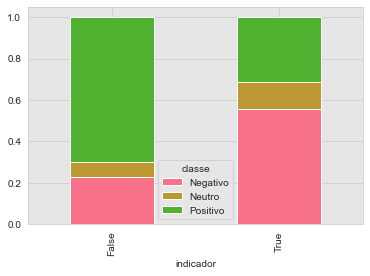

In [21]:
pct_df = df_boolean.divide(df_boolean.sum(axis=1), axis=0)
pct_df.plot(kind="bar", stacked=True)

#### **Preparação dos dados**

* Não podemos trabalhar com o texto cru, pois não funcionaria bem na hora da vetorização e aplicação de modelo estatístico

### **Stopwords**  

* Remove palavras desnecessárias que não carregam nenhum significado. Tais palavras, dentro de uma abordagem de NLP, são irrelevantes e sua remoção colaboram com a analise textual; 
> 
* Alguns exemplos de stopwords comuns no português são preposições (em, na, no, etc), artigos (a, o,os, etc), conjunções (e, mas, etc), entre outras. 

In [22]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

### **Stemming**  

* Serve para diminuirmos a palavra até a sua raiz/base, pois assim, conseguimos tratar as palavras originais e suas respectivas derivações de uma mesma maneira;
>  
* Exemplo: As palavras Correr e Corrida quando submetidas à nossa função de Stemming, ambas as palavras serão diminuídas até a base Corr. 

In [23]:
from nltk.stem import RSLPStemmer

def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

### **Limpeza**  
* É possível fazer uma limpeza nas strings que possam "sujar" a frase e atrapalhar a análise;
> 
* Remove strings.

In [24]:
import re
re.compile('<title>(.*)</title>')

def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

#### **Lemmatization**

* Importante ressaltar que é necessário cautela ao usar Lemma e Stemming juntos, já que ambos apresentam funções de redução similares  

Lematização é o processo de agrupar as diferentes formas flexionadas de uma palavra para que possam ser analisadas como um único item.  

Exemplos de lematização:  

1. jogar, jogo e jogador todas essas 3 palavras serão convertidas para jogo após a lematização;  

2. alterar, alternância e alterado todas essas palavras serão convertidas para alteração após a lematização.

In [25]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#def Lemmatization(instancia):
  #palavras = []
  #for w in instancia.split():
    #palavras.append(wordnet_lemmatizer.lemmatize(w))
  #return (" ".join(palavras))

#### **Criando uma função para aplicar as funções acima**

In [26]:
#!pip install nltk
import nltk 
import re
re.compile('<title>(.*)</title>')

def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

#Aplicando a função:

df_copy['texto'] = [Preprocessing(i) for i in df_copy['review_comment_message']]

In [27]:
df_copy['texto'][:50]

9      aparelh efici sit marc aparelh impress 3desinf...
15             vend confiável, produt ok entreg ant praz
19                                                  péss
22                                            loj not 10
34     receb exat esper demal encomend outr vend atra...
36                                               recom ,
38     tô complet apaixonada, loj sup respons confiável!
43                                             bom cheir
59                                               mt lind
67                                            recom vend
79     kit mochil patrulh canin lindo!! net vai amar!...
90                                             sup rápid
108                                             ok recom
131    entreg divid dua comunic loj cheg pens hav env...
163                                    gost atenç entreg
166    vidr quebr vei caix nenhum proteç dentro, caix...
167                                             peç serv
170    esper receb semana, tão 

In [28]:
type(df_copy['texto'])

pandas.core.series.Series

### **Tokenization**  

O RegexpTokenizer divide uma string em substrings usando uma expressão regular. Por exemplo, o tokenizer a seguir forma tokens de sequências alfabéticas, expressões de dinheiro e quaisquer outras sequências que não sejam espaços em branco:

from nltk.tokenize import RegexpTokenizer 

s = “Bom muffins custam $3,88\nin Nova York. Por favor, compre para mim\nduas.\n\nObrigado.”

tokenizer = RegexpTokenizer('\w+|$[\d.]+|\S+')

tokenizer.tokenize(s) ['Bom', 'muffins', 'custo', 'em', 'Novo', 'York', '.', 'Por favor', 'comprar', 'eu', 'dois' , 'de', 'eles', '.', 'Obrigado', '.']

In [29]:
import nltk
from nltk import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

## Aplicando

df_copy['texto'] = df_copy['texto'].map(tokenizer.tokenize)
df_copy['texto'].head(10)

9     [aparelh, efici, sit, marc, aparelh, impress, ...
15     [vend, confiável, produt, ok, entreg, ant, praz]
19                                               [péss]
22                                       [loj, not, 10]
34    [receb, exat, esper, demal, encomend, outr, ve...
36                                              [recom]
38    [tô, complet, apaixonada, loj, sup, respons, c...
43                                         [bom, cheir]
59                                           [mt, lind]
67                                        [recom, vend]
Name: texto, dtype: object

In [30]:
df_copy.head(10)

,review_score,review_comment_message,classe,indicador,texto
9,4,aparelho eficiente. no site a marca do aparelh...,Positivo,False,"[aparelh, efici, sit, marc, aparelh, impress, ..."
15,5,"Vendedor confiável, produto ok e entrega antes...",Positivo,False,"[vend, confiável, produt, ok, entreg, ant, praz]"
19,1,Péssimo,Negativo,False,[péss]
22,5,Loja nota 10,Positivo,False,"[loj, not, 10]"
34,4,Recebi exatamente o que esperava. As demais en...,Positivo,False,"[receb, exat, esper, demal, encomend, outr, ve..."
36,5,"Recomendo ,",Positivo,False,[recom]
38,5,"Tô completamente apaixonada, loja super respon...",Positivo,False,"[tô, complet, apaixonada, loj, sup, respons, c..."
43,5,Muito bom. muito cheiroso.,Positivo,False,"[bom, cheir]"
59,5,MT lindo,Positivo,False,"[mt, lind]"
67,5,Recomendo o vendedor...,Positivo,False,"[recom, vend]"


#### **Transformando os tokens em sentenças**: necessário para a vetorização

In [31]:
## Função:

def combine_txt(t):
    c  = ' '.join(t)
    return c

# Aplicando:

df_copy['texto'] = df_copy['texto'].apply(lambda x: combine_txt(x))
df_copy.head(10)

,review_score,review_comment_message,classe,indicador,texto
9,4,aparelho eficiente. no site a marca do aparelh...,Positivo,False,aparelh efici sit marc aparelh impress 3desinf...
15,5,"Vendedor confiável, produto ok e entrega antes...",Positivo,False,vend confiável produt ok entreg ant praz
19,1,Péssimo,Negativo,False,péss
22,5,Loja nota 10,Positivo,False,loj not 10
34,4,Recebi exatamente o que esperava. As demais en...,Positivo,False,receb exat esper demal encomend outr vend atra...
36,5,"Recomendo ,",Positivo,False,recom
38,5,"Tô completamente apaixonada, loja super respon...",Positivo,False,tô complet apaixonada loj sup respons confiável
43,5,Muito bom. muito cheiroso.,Positivo,False,bom cheir
59,5,MT lindo,Positivo,False,mt lind
67,5,Recomendo o vendedor...,Positivo,False,recom vend


### **CountVectorizer (Matriz Esparsa)**  

* Ele é usado para transformar um determinado texto em um vetor (one-hot-encoded) com base na frequência (contagem) de cada palavra que ocorre em todo o texto. Envolve contar o número de ocorrências que cada palavra aparece em um documento (texto).  
> 
* O resultado deste método é uma matriz Esparsa. São matrizes nas quais a maioria das posições são preenchidas com zeros. Para essas matrizes, podemos economizar espaço de memória significativo se apenas termos diferentes de zero forem armazenados.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import cross_val_predict

vectorizer = CountVectorizer(analyzer="word")

matriz = vectorizer.fit_transform(df_copy['texto'])

type(matriz)

scipy.sparse.csr.csr_matrix

In [33]:
matriz.shape

(9839, 6002)

In [34]:
# Colocando os dados em outras variáveis para facilitar a chamada

texto = df_copy['texto']
classes = df_copy['classe']
type(texto)

pandas.core.series.Series

#### **Multinomial Naive Bayes**

Naive Bayes é o algoritmo de classificação mais direto e rápido, adequado para uma grande quantidade de dados. O classificador Naive Bayes é usado com sucesso em várias aplicações, como filtragem de spam, classificação de texto, análise de sentimentos e sistemas de recomendação. Ele usa o teorema de probabilidade de Bayes para predição de classe desconhecida.

In [35]:
modelo = MultinomialNB()
modelo.fit(matriz,classes)

MultinomialNB()

In [36]:
matriz.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### **Podemos fazer o teste do modelo em uma pequena amostra de textos**

In [37]:
# defina instâncias de teste dentro de uma lista
testes = ['A entrega foi efetuada muito antes do prazo dado.',
          'Recebi exatamente o que esperava. As demais encomendas de outros vendedores atrasaram, mas esta chegou no prazo.',
          'Não recomendaria esta loja nem pretendo voltar a comprar nela.A mercadoria foi entregue após o prazo e quase 1 mês após a compra. Estranhei muito',
          'Excelente produto.',
          "Creme maravilhoso e entrega super rápida",
          'A embalagem deixou a desejar, por pouco o produto não foi danificado, a caixa estava toda amassada.',
          'Não gostei do produto, material de péssima qualidade.',
          'Atendimento excelente',
          'Somente foi entregue uma unidade, ao invés de duas.',
          'Fiquei feliz com. O tecido ,mas acho que faltou o lençol de cima para ficar completo, espero que logo lancem.',
          'A bolsa e muito bonita por fora. Mas dentro não tem forro e é bem fragil',
          'Fonte veio diferente do anunciado.',
          'Produto com funcionamento correto, porem qualidade do material muito baixa.',
          'Frete muito caro.',
          'Produto Maravilhoso, exatamente como anunciado! Amei e já coloquei! Recomendo muito!',
          'é muito desordenado comprei três produtos mais não veio no dia sertões veio separado e em data separada']

In [38]:
testes = [Preprocessing(i) for i in testes]

In [39]:
matriz_teste = vectorizer.transform(testes)

In [40]:
# Fazendo a classificação com o modelo treinado:

for t, c in zip (testes,modelo.predict(matriz_teste)):
    print (t +", "+ c)

entreg efetu ant praz dad, Positivo
receb exat esper demal encomend outr vend atrasaram, cheg praz, Positivo
recomend loj pret volt compr nela mercad entreg após praz quas 1 mê após compr estranh, Negativo
excel produt, Positivo
crem maravilh entreg sup rápid, Positivo
embal deix desejar, pouc produt danificado, caix tod amass, Neutro
gost produto, mater péss qual, Positivo
atend excel, Positivo
soment entreg unidade, invé dua, Negativo
fiq feliz tec ,ma ach falt lençol cim fic completo, esper log lanc, Negativo
bols bonit dentr forr bem fragil, Positivo
font vei difer anunci, Negativo
produt funcion correto, por qual mater baix, Positivo
fret car, Positivo
produt maravilhoso, exat anunciado! ame coloquei! recom muito!, Positivo
desorden compr trê produt vei dia sert vei separ dat separ, Negativo


In [41]:
# Probabilidades de cada classe na análise acima

print (modelo.classes_)
modelo.predict_proba(matriz_teste).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.  , 0.  , 0.99],
       [0.01, 0.  , 0.98],
       [0.94, 0.  , 0.06],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.21, 0.59, 0.2 ],
       [0.34, 0.02, 0.64],
       [0.  , 0.  , 1.  ],
       [0.98, 0.01, 0.01],
       [0.54, 0.42, 0.04],
       [0.  , 0.01, 0.99],
       [0.63, 0.07, 0.3 ],
       [0.05, 0.02, 0.93],
       [0.16, 0.19, 0.65],
       [0.  , 0.  , 1.  ],
       [0.7 , 0.1 , 0.21]])

### **Tag de Negações**

* Acrescenta uma tag _NEG encontrada após um 'não'.
* Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
* Exemplos: 
    - Eu não gosto do partido e também nunca votaria nesse governante!  
    ~ Eu não gosto_NEG do_NEG partido_NEG e_NEG também_NEG nunca_NEG votaria_NEG nesse_NEG governante!_NEG

In [42]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

### **Criando modelos com Pipelines**

* Pipelines são interessantes para reduzir código e automatizar fluxos

In [43]:
from sklearn.pipeline import Pipeline

pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

* Pipeline que atribui tag de negacões nas palavras

In [44]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [45]:
pipeline_simples.fit(texto,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

* Etapas do pipeline

In [46]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

In [47]:
pipeline_negacoes.fit(texto,classes)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x000001B606609E50>)),
                ('classifier', MultinomialNB())])

In [48]:
pipeline_negacoes.steps

[('counts',
  CountVectorizer(tokenizer=<function <lambda> at 0x000001B606609E50>)),
 ('classifier', MultinomialNB())]

* Modelo com SVM

In [49]:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

In [50]:
pipeline_svm_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', svm.SVC(kernel='linear'))
])

#### Validando os Modelos com Validação Cruzada

* Fazendo o cross validation do modelo

In [51]:
resultados = cross_val_predict(pipeline_simples, texto, classes, cv=10)

* Medindo a acurácia média do modelo

In [52]:
import sklearn.metrics as metrics

metrics.accuracy_score(classes,resultados)

0.8373818477487549

* Medidas de validação do modelo

In [53]:
sentimento=['Positivo','Negativo','Neutro']

print(metrics.classification_report(classes,resultados,sentimento))
#dados neutros com precisão baixa (pouca amostra ou é difícil pro modelo identificar uma frase "neutra"?)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



              precision    recall  f1-score   support

    Positivo       0.89      0.94      0.91      6855
    Negativo       0.72      0.78      0.75      2247
      Neutro       0.22      0.04      0.07       737

    accuracy                           0.84      9839
   macro avg       0.61      0.59      0.58      9839
weighted avg       0.80      0.84      0.81      9839



* Matriz de confusão: nos permite analisar onde o algoritmo está errando com maior frequência

In [54]:
print(pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      1751      41       455  2247
Neutro         342      29       366   737
Positivo       335      61      6459  6855
All           2428     131      7280  9839


In [55]:
def Metricas(modelo, texto, classes):
  resultados = cross_val_predict(modelo, texto, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

### **Naive Bayes**

In [56]:
# naive bayes simples
Metricas(pipeline_simples,texto,classes)

'Acurácia do modelo: 0.8373818477487549'

In [57]:
# naive bayes com tag de negacoes (piorou com o uso de negações)
Metricas(pipeline_negacoes,texto,classes)

'Acurácia do modelo: 0.711556052444354'

### **Support Vector Machine (SVM) ~ (funciona melhor ainda com dados binários)**

 * É um algoritmo de aprendizado de máquina supervisionado que pode ser usado para desafios de classificação ou regressão. Analisa os dados e reconhece padrões. Linear SVM é o mais novo algoritmo de aprendizado de máquina (mineração de dados) extremamente rápido para resolver problemas de classificação multiclasse de conjuntos de dados ultra grandes que implementa uma versão proprietária original de um algoritmo de plano de corte para projetar uma máquina de vetor de suporte linear. LinearSVM é uma rotina linearmente escalável, o que significa que ela cria um modelo SVM em um tempo de CPU que escala linearmente com o tamanho do conjunto de dados de treinamento.


In [58]:
# svm linear simples
Metricas(pipeline_svm_simples,texto,classes)

'Acurácia do modelo: 0.8296574855168208'

In [59]:
# svm linear com tag de negacoes (é bem mais demorado, pois as palavras que estão após um NÃO irão duplicar)
Metricas(pipeline_svm_negacoes,texto,classes)

'Acurácia do modelo: 0.7478402276654131'

#### **Modelo com a Tag de Negações**

In [60]:
resultados = cross_val_predict(pipeline_negacoes,texto, classes, cv=10)

In [61]:
metrics.accuracy_score(classes,resultados)

0.711556052444354

In [62]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.73      0.96      0.83      6855
    Negativo       0.55      0.19      0.28      2247
      Neutro       0.09      0.01      0.02       737

    accuracy                           0.71      9839
   macro avg       0.46      0.39      0.38      9839
weighted avg       0.64      0.71      0.64      9839



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



* Matriz de confusão

In [63]:
# Podemos comparar o resultado das duas matrizes e verificar em quais ele acertou mais em cada classe
# Nesta segunda matriz podemos ver que o modelo acertou bem menos em negativo com a tag de negações

print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       430      62      1755  2247
Neutro          97       9       631   737
Positivo       261      32      6562  6855
All            788     103      8948  9839


## **Considerações Finais**
### **É possível implementar nosso modelo com alguns adicionais, como:**
* Aumentar features (temos bag of words), poderíamos aumentar a quantidade de palavras, considerar emojis;
* Dados binários fluem muito bem com SVM, apesar do algoritmo ter funcionado um pouco melhor que NB com nossas 3 classes;
* Talvez dar uma pesquisada em métodos de Lemmatizer e Stemming voltados à lingua Portuguesa;
* Sinta-se livre para modificar/aprimorar esse código.